<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/Bioprocess_Mass_loss_prediction_Tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [72]:
df = pd.read_excel("/content/sample_data/Bioprocess.xlsx")

In [73]:
df

,StepID,UOFlowVolIn,UOFlowVolOut,UOFlowConcIn,UOFLowConcOut,ArJobID,RunNum,MassIn,MassOut,MassLoss(unexpected),StepYield
0,a,1750.000000,2229.471905,11.315173,7.542179,147.0,1.0,19801.553398,16815.077209,0.0,84.91797
1,b,2229.471905,2358.781275,7.542179,7.054756,147.0,1.0,16815.077209,16640.625361,0.0,98.96253
2,c,2358.781275,642.811329,7.054756,25.000000,147.0,1.0,16640.625361,16070.283228,0.0,96.57259
3,d,642.811329,2143.175466,25.000000,6.398793,147.0,1.0,16070.283228,13713.735723,0.0,85.33599
4,e,2143.175466,508.876725,6.398793,25.000000,147.0,1.0,13713.735723,12721.918119,0.0,92.76771
...,...,...,...,...,...,...,...,...,...,...,...
170668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
170669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
170670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
170671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [74]:
df.isnull().sum()

StepID                  162673
UOFlowVolIn             162673
UOFlowVolOut            162673
UOFlowConcIn            162673
UOFLowConcOut           162673
ArJobID                 162674
RunNum                  162673
MassIn                   48247
MassOut                 162673
MassLoss(unexpected)    161674
StepYield               162673
dtype: int64

In [75]:
# prompt: drop StepID

df = df.drop("StepID", axis=1)


In [76]:
# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include='number').columns
non_numerical_cols = df.select_dtypes(exclude='number').columns

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values in non-numerical columns with the most frequent value
for col in non_numerical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Display the first few rows of the dataset after filling missing values
print("Dataset after filling missing values:")
print(df.head())


Dataset after filling missing values:
   UOFlowVolIn  UOFlowVolOut  UOFlowConcIn  UOFLowConcOut  ArJobID  RunNum  \
0  1750.000000   2229.471905     11.315173       7.542179    147.0     1.0   
1  2229.471905   2358.781275      7.542179       7.054756    147.0     1.0   
2  2358.781275    642.811329      7.054756      25.000000    147.0     1.0   
3   642.811329   2143.175466     25.000000       6.398793    147.0     1.0   
4  2143.175466    508.876725      6.398793      25.000000    147.0     1.0   

         MassIn       MassOut  MassLoss(unexpected)  StepYield  
0  19801.553398  16815.077209                   0.0   84.91797  
1  16815.077209  16640.625361                   0.0   98.96253  
2  16640.625361  16070.283228                   0.0   96.57259  
3  16070.283228  13713.735723                   0.0   85.33599  
4  13713.735723  12721.918119                   0.0   92.76771  


In [77]:
df.isnull().sum()

UOFlowVolIn             0
UOFlowVolOut            0
UOFlowConcIn            0
UOFLowConcOut           0
ArJobID                 0
RunNum                  0
MassIn                  0
MassOut                 0
MassLoss(unexpected)    0
StepYield               0
dtype: int64

In [78]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the dataset
imputed_data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display the first few rows of the imputed dataset
print("Imputed dataset:")
print(imputed_data.head())


Imputed dataset:
   UOFlowVolIn  UOFlowVolOut  UOFlowConcIn  UOFLowConcOut  ArJobID  RunNum  \
0  1750.000000   2229.471905     11.315173       7.542179    147.0     1.0   
1  2229.471905   2358.781275      7.542179       7.054756    147.0     1.0   
2  2358.781275    642.811329      7.054756      25.000000    147.0     1.0   
3   642.811329   2143.175466     25.000000       6.398793    147.0     1.0   
4  2143.175466    508.876725      6.398793      25.000000    147.0     1.0   

         MassIn       MassOut  MassLoss(unexpected)  StepYield  
0  19801.553398  16815.077209                   0.0   84.91797  
1  16815.077209  16640.625361                   0.0   98.96253  
2  16640.625361  16070.283228                   0.0   96.57259  
3  16070.283228  13713.735723                   0.0   85.33599  
4  13713.735723  12721.918119                   0.0   92.76771  


In [79]:
df.head(5)

,UOFlowVolIn,UOFlowVolOut,UOFlowConcIn,UOFLowConcOut,ArJobID,RunNum,MassIn,MassOut,MassLoss(unexpected),StepYield
0,1750.000000,2229.471905,11.315173,7.542179,147.0,1.0,19801.553398,16815.077209,0.0,84.91797
1,2229.471905,2358.781275,7.542179,7.054756,147.0,1.0,16815.077209,16640.625361,0.0,98.96253
2,2358.781275,642.811329,7.054756,25.000000,147.0,1.0,16640.625361,16070.283228,0.0,96.57259
3,642.811329,2143.175466,25.000000,6.398793,147.0,1.0,16070.283228,13713.735723,0.0,85.33599
4,2143.175466,508.876725,6.398793,25.000000,147.0,1.0,13713.735723,12721.918119,0.0,92.76771


In [79]:
sns.distplot(df['Age'], kde=False, bins=30)
plt.show()

In [81]:
import seaborn as sns

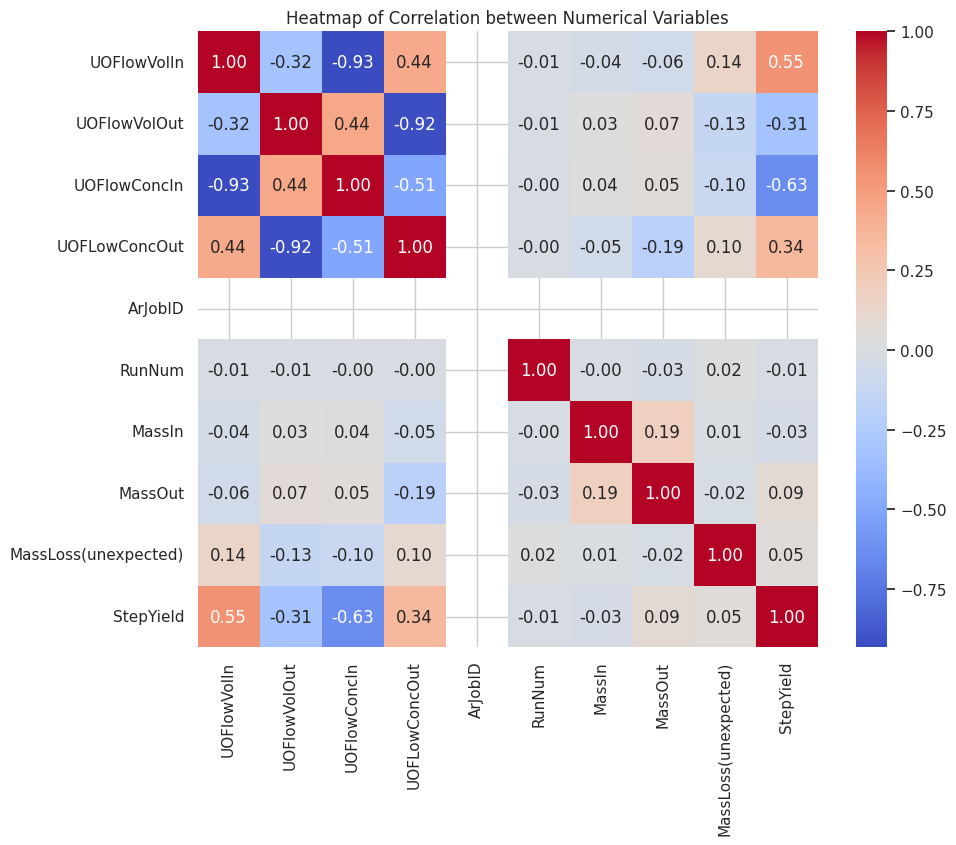

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Numerical Variables')
plt.show()

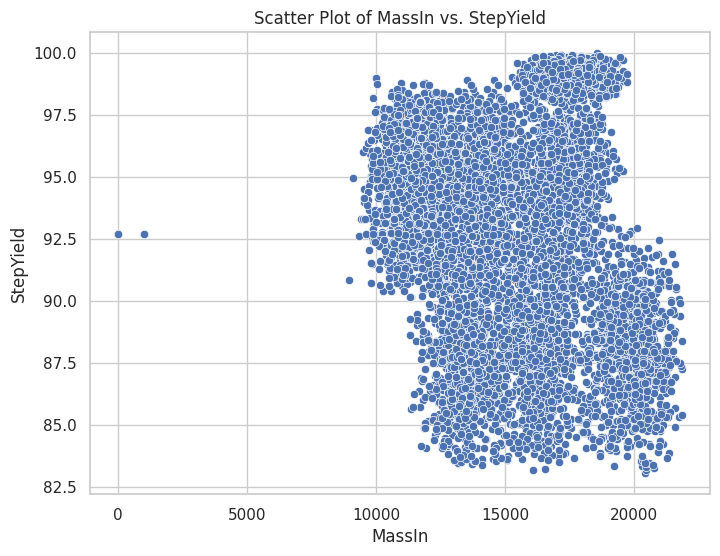

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MassIn', y='StepYield', data=df)
plt.title('Scatter Plot of MassIn vs. StepYield')
plt.xlabel('MassIn')
plt.ylabel('StepYield')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['MassLoss(unexpected)'])  # Features excluding the target variable
y = df['MassLoss(unexpected)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (136538, 9) (136538,)
Testing set shape (X_test, y_test): (34135, 9) (34135,)


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [87]:
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [88]:
train_predictions = decision_tree.predict(X_train)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
print("Training RMSE:", train_rmse)

Training RMSE: 1.3269526023063636


In [89]:
from sklearn.metrics import mean_squared_error


test_predictions = decision_tree.predict(X_test)


test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
print("Testing RMSE:", test_rmse)


Testing RMSE: 22.380440327262527


In [90]:

prediction_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})


print("Actual vs Predicted Values:")
print(prediction_comparison.head())


Actual vs Predicted Values:
           Actual  Predicted
65050   17.769916  17.769916
143892  17.769916  17.769916
120183  17.769916  17.769916
125786  17.769916  17.769916
92735   17.769916  17.769916


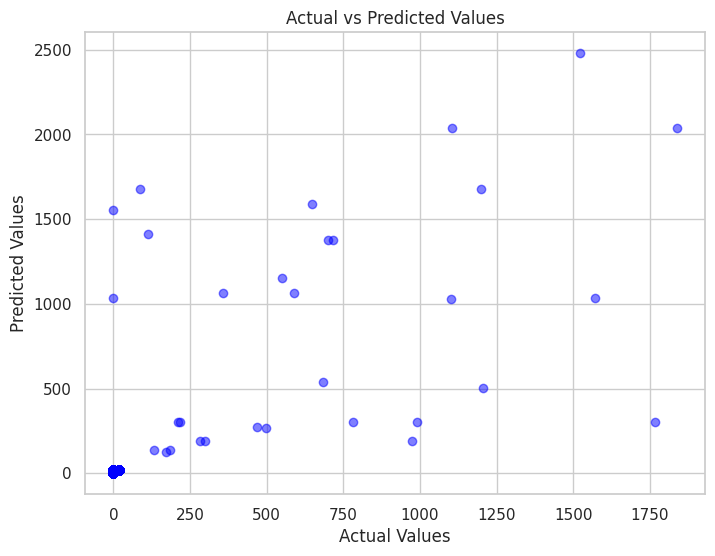

In [91]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


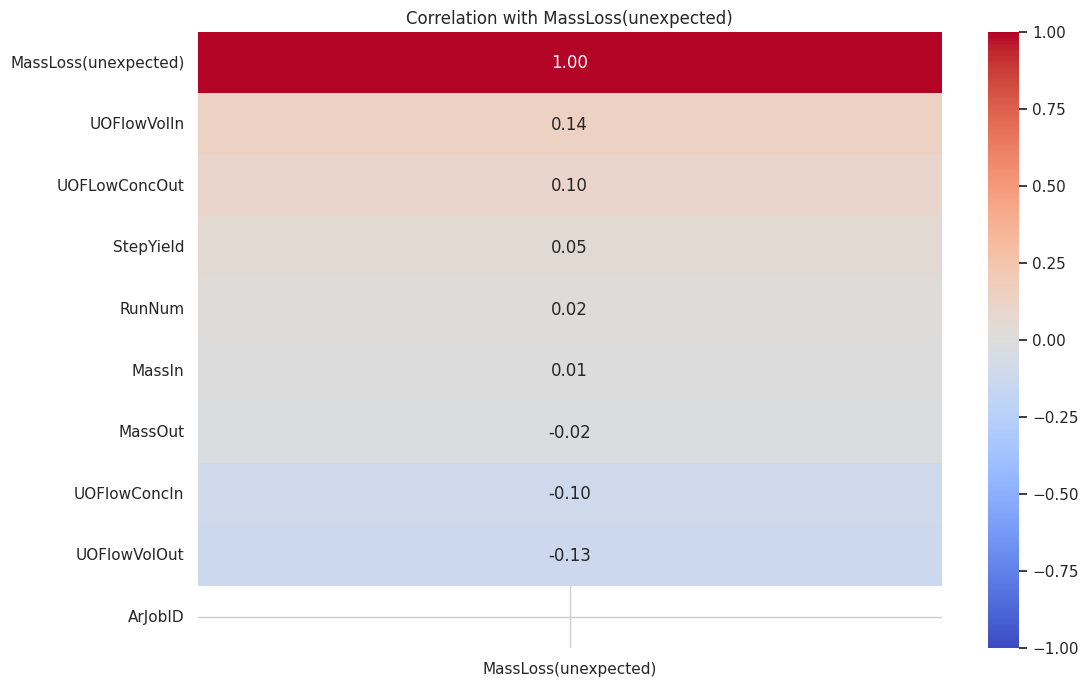

In [92]:

correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['MassLoss(unexpected)']].sort_values(by='MassLoss(unexpected)', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation with MassLoss(unexpected)')
plt.show()


FINDIND BOTTLENECK USING COORELATION MARTIX

In [93]:

highest_correlation_feature = correlation_matrix['MassLoss(unexpected)'].sort_values(ascending=False).index[1]
print(f"Feature with highest correlation to 'MassLoss(unexpected)': {highest_correlation_feature}")


Feature with highest correlation to 'MassLoss(unexpected)': UOFlowVolIn


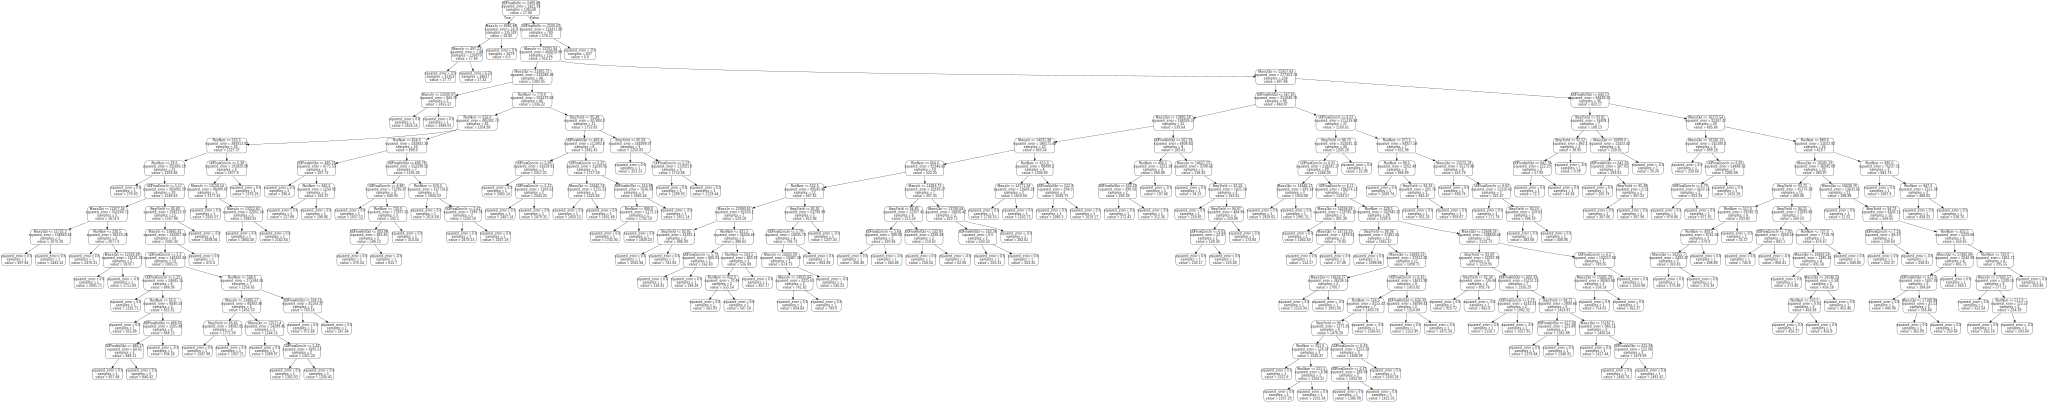

In [94]:
# prompt: Will you make the tree diagram?

from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a file
export_graphviz(decision_tree, out_file='tree.dot', feature_names=X.columns, rounded=True, precision=2)

# Load the exported DOT file and render it
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


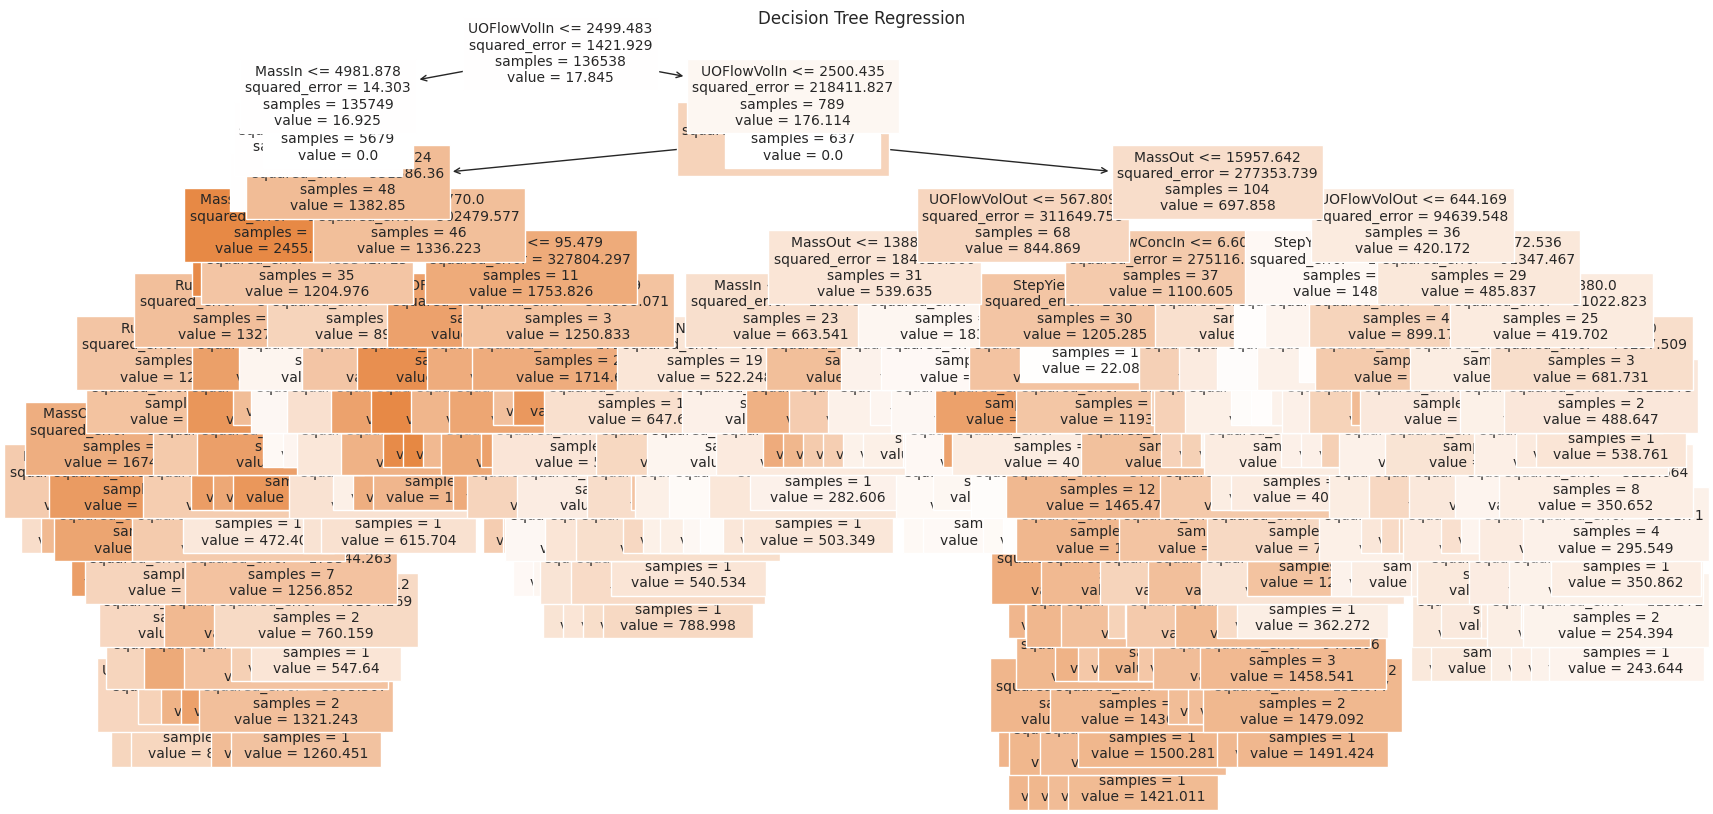

In [96]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()


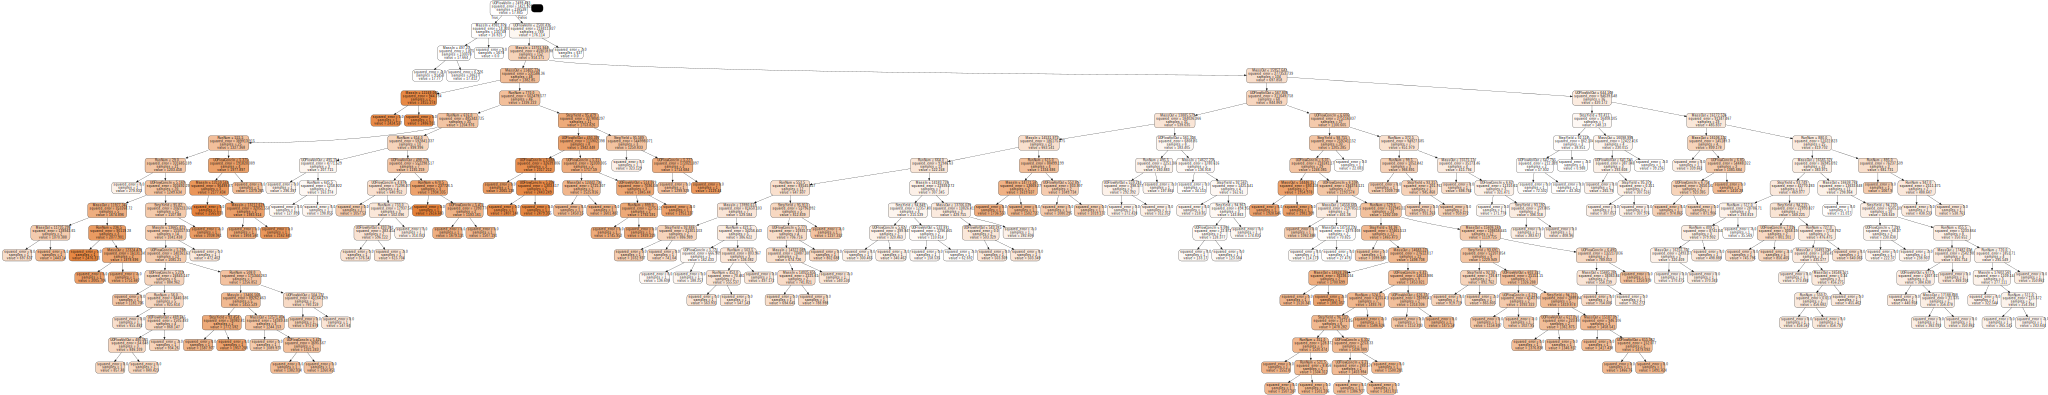

In [99]:
from sklearn.tree import export_graphviz
import pydotplus
import plotly.graph_objects as go
from IPython.display import SVG

# Export the decision tree as a Graphviz format
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)

# Convert the Graphviz DOT data into a Plotly figure
graph = pydotplus.graph_from_dot_data(dot_data)
plotly_fig = graph.create_svg().decode("utf-8")

# Display the Plotly figure
SVG(plotly_fig)
